<a href="https://colab.research.google.com/github/DenisDorokhov1/Course_paper/blob/main/Latent_Dirichlet_Allocation_(LDA).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


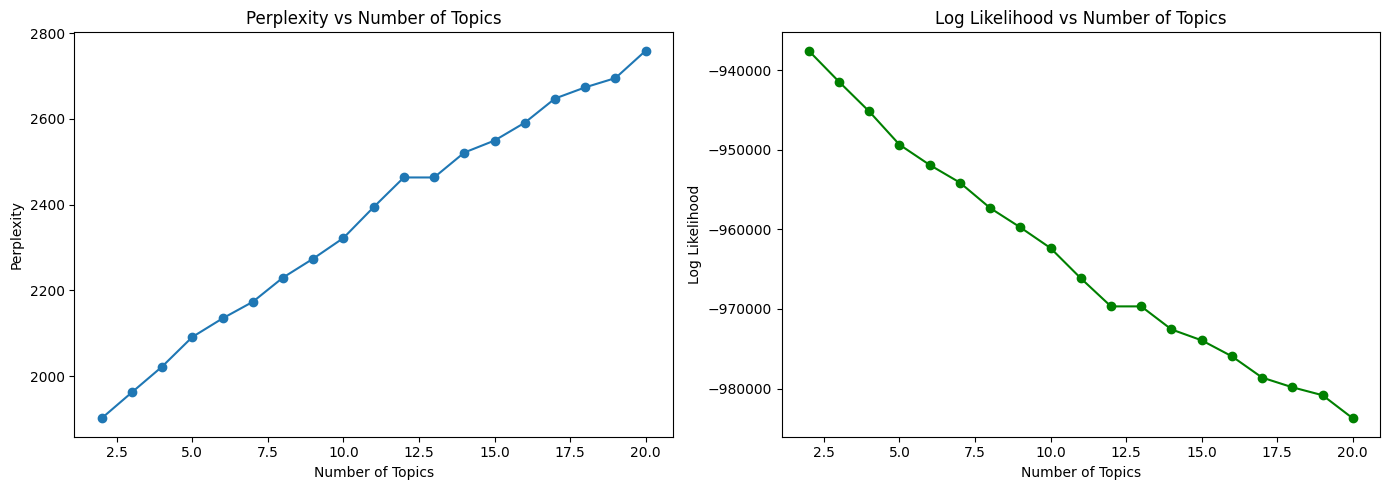

In [1]:
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import seaborn as sns
import re
import string

# Загрузка стоп-слов
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))

file_path_data = "/content/TMDB_movies_with_overview_sentiment.csv"
df = pd.read_csv(file_path_data)

def preprocess(text):
    text = text.lower()
    text = re.sub(f"[{re.escape(string.punctuation)}]", " ", text)
    tokens = text.split()
    tokens = [t for t in tokens if t not in stop_words and len(t) > 2]
    return " ".join(tokens)

df['clean_overview'] = df['overview'].astype(str).apply(preprocess)

vectorizer = CountVectorizer(max_df=0.95, min_df=10)
X = vectorizer.fit_transform(df['clean_overview'])

perplexities = []
log_likelihoods = []
topic_range = range(2, 21)

for n_topics in topic_range:
    lda = LatentDirichletAllocation(n_components=n_topics, random_state=42)
    lda.fit(X)
    perplexities.append(lda.perplexity(X))
    log_likelihoods.append(lda.score(X))


plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(topic_range, perplexities, marker='o')
plt.title("Perplexity vs Number of Topics")
plt.xlabel("Number of Topics")
plt.ylabel("Perplexity")

plt.subplot(1, 2, 2)
plt.plot(topic_range, log_likelihoods, marker='o', color='green')
plt.title("Log Likelihood vs Number of Topics")
plt.xlabel("Number of Topics")
plt.ylabel("Log Likelihood")

plt.tight_layout()
plt.show()